In [91]:

t_n =  2.51 # mm
t_l =  0.5 # mm
B = 25.0 # mm 

In [92]:
import numpy as np
import pandas as pd

In [93]:
def get_vector(list_of_layers):
    vector = [0,0,0,0]
    if "X" in list_of_layers:
        vector[0] = 1
    if "SX" in list_of_layers:
        vector[1] = 1
    if "Y" in list_of_layers:
        vector[2] = 1
    if "SY" in list_of_layers:
        vector[3] = 1

    return vector


In [94]:
composition = [
        ["Y", "Y"],
        ["Y", "X"],
        ["Y", "SX"],
        ["Y", "SY"],
        ["Y","SX", "SY"],
        ["Y","X", "SY"]
    ]

df = pd.DataFrame({"layers":composition})
df['v [X,SX,Y,SY]'] = df['layers'].apply(get_vector)
# 
n_l = [ len(i) for i in composition]
n_l = np.array(n_l)
t_t = t_n + np.sum(n_l)*t_l
Ygs = [ t_n + np.arange(1,in_l+1,1)*t_l  for in_l in n_l]
I_l = [ B*t_l*(t_l**2/12 + iYgs**2) for iYgs in Ygs]

I_n = B*t_n*(t_n**2/12)

I_t = B*t_t*(t_t**2/12)

df["Ygs"] = Ygs
df["n_l"] = n_l

# sort X,SX,Y,SY




In [95]:
df

,layers,"v [X,SX,Y,SY]",Ygs,n_l
0,"[Y, Y]","[0, 0, 1, 0]","[3.01, 3.51]",2
1,"[Y, X]","[1, 0, 1, 0]","[3.01, 3.51]",2
2,"[Y, SX]","[0, 1, 1, 0]","[3.01, 3.51]",2
3,"[Y, SY]","[0, 0, 1, 1]","[3.01, 3.51]",2
4,"[Y, SX, SY]","[0, 1, 1, 1]","[3.01, 3.51, 4.01]",3
5,"[Y, X, SY]","[1, 0, 1, 1]","[3.01, 3.51, 4.01]",3


In [96]:
def E_flexion(E_n,E_l):

    E_l = np.array(E_l)

    E_l_dict = {"X":E_l[0], "SX":E_l[1], "Y":E_l[2], "SY":E_l[3]}
    E_l_sel = [ [ E_l_dict[i] for i in l] for l in composition]
    El_Il_sum =  np.array([ np.sum(iE*iI) 
                       for iE,iI in zip(E_l_sel,I_l)])
    return (E_n*I_n + El_Il_sum)/I_t



In [97]:
df_data = pd.read_csv("experimental.csv")

In [98]:
df_data["Modulo flexion [GPa]"] =  df_data["Modulo flexion [MPa]"]/1000
df_data = df_data.drop(columns=["Modulo flexion [MPa]"])
df_data = df_data.drop(columns=["Tension maxima [MPa]"])
df_data["Espesor [mm]"] = 0.5*df_data["Espesor [mm]"] + 0.5*df_data["Espesor_2 [mm]"]
df_data = df_data.drop(columns=["Espesor_2 [mm]"])

# 
#  Ancho [mm]-> B [mm]
#  Espesor [mm] -> t [mm]
#  Modulo flexion [MPa] -> E [GPa]

df_data["B [mm]"] = df_data["Ancho [mm]"]
df_data["t [mm]"] = df_data["Espesor [mm]"]
df_data["E [GPa]"] = df_data["Modulo flexion [GPa]"]

df_data = df_data.drop(columns=["Ancho [mm]"])
df_data = df_data.drop(columns=["Espesor [mm]"])
df_data = df_data.drop(columns=["Modulo flexion [GPa]"])


In [99]:
df_stats = df_data.groupby('Nombre').agg(['mean', 'std'])
df_stats["layers"] = composition

In [100]:
df_stats

B [mm]              t [mm]              E [GPa]            \
             mean       std      mean       std       mean       std   
Nombre                                                                 
TFP1-1  25.600000  0.100000  5.100000  0.000000  13.201050  0.630858   
TFP2-1  25.566667  0.057735  4.600000  0.050000   9.869501  0.780113   
TFP3-1  25.400000  0.173205  4.866667  0.076376   9.222003  0.495965   
TFP4-1  25.666667  0.152753  4.600000  0.000000  10.181815  0.770635   
TFP5-1  25.166667  0.152753  5.716667  0.057735   6.143105  0.161637   
TFP6-1  25.033333  0.635085  5.566667  0.028868   7.798060  0.334186   

             layers  
                     
Nombre               
TFP1-1       [Y, Y]  
TFP2-1       [Y, X]  
TFP3-1      [Y, SX]  
TFP4-1      [Y, SY]  
TFP5-1  [Y, SX, SY]  
TFP6-1   [Y, X, SY]

In [101]:
from matplotlib import pyplot as plt

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'TFP1-1'),
  Text(1, 0, 'TFP2-1'),
  Text(2, 0, 'TFP3-1'),
  Text(3, 0, 'TFP4-1'),
  Text(4, 0, 'TFP5-1'),
  Text(5, 0, 'TFP6-1')])

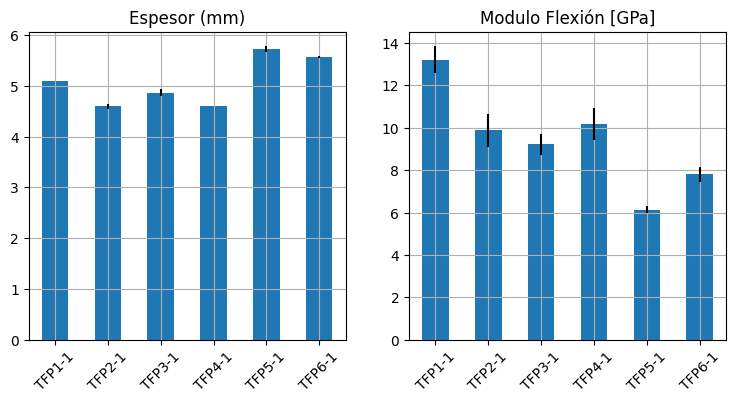

In [102]:
# plot bars with error bars Espesor (mm)
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(121)
df_stats['t [mm]'].plot(kind='bar', y='mean', 
                        yerr='std', 
                        legend=False, 
                        title='Espesor (mm)', 
                        ax=ax)
# ticks angle
plt.xticks(rotation=45)
plt.xlabel('') 

# plot bars with error bars Modulo Tracción [MPa]
plt.grid()
ax = fig.add_subplot(122)
df_stats['E [GPa]'].plot(kind='bar', y='mean', yerr='std', legend=False, 
                         title='Modulo Flexión [GPa]', ax=ax)
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)

In [103]:
n_l

array([2, 2, 2, 2, 3, 3])

In [104]:
t_n

2.51

In [105]:
t_l

0.5

In [106]:
n_l*t_l + 2*t_l*n_l

array([3. , 3. , 3. , 3. , 4.5, 4.5])

In [107]:
tau_pred_fcn = lambda tn,tl: tn + 2*tl*n_l

E_n = 20
E_l = [ 40,20,30,30]

E_fl_pred = E_flexion(E_n,E_l)

tau_pred = tau_pred_fcn(t_n,t_l)


In [108]:
len(E_flexion(E_n,E_l))

6

In [109]:
df_data["E [GPa]"]

0     13.328664
1     13.758346
2     12.516141
3     10.753250
4      9.578681
5      9.276571
6      8.650652
7      9.541590
8      9.473768
9     11.061118
10     9.860483
11     9.623845
12     6.069124
13     6.328492
14     6.031700
15     7.960318
16     8.020138
17     7.413724
Name: E [GPa], dtype: float64

In [110]:
# optimize E_n and E_l 
from scipy.optimize import minimize,basinhopping

def objective(x):
    E_n = x[0]
    E_l = x[1:]

    Loss = np.sum((E_flexion(E_n,E_l) - df_stats["E [GPa]"]["mean"].values)**2)

    # E_n > E_l for all layers
    Loss_nucl = np.sum(np.maximum(0,E_n - E_l))
    return Loss + Loss_nucl*1e4

x0 = np.array([E_n,*E_l])

# must be positive
bounds = [(0,None) for i in range(len(x0))]
res = basinhopping(objective, x0, niter=50,minimizer_kwargs={"bounds":bounds,"method":"Nelder-Mead"})
res
E_l_opt = res.x[1:]
E_n_opt = res.x[0]
E_fl_pred = E_flexion(res.x[0],res.x[1:])
tau_pred = tau_pred_fcn(t_n,t_l)

In [111]:
t_n + t_l

3.01

In [112]:
t_l

0.5

In [113]:
df_stats["E pred [GPa]"] = E_fl_pred
df_stats["t pred [MPa]"] = tau_pred

In [114]:
df_stats

B [mm]              t [mm]              E [GPa]            \
             mean       std      mean       std       mean       std   
Nombre                                                                 
TFP1-1  25.600000  0.100000  5.100000  0.000000  13.201050  0.630858   
TFP2-1  25.566667  0.057735  4.600000  0.050000   9.869501  0.780113   
TFP3-1  25.400000  0.173205  4.866667  0.076376   9.222003  0.495965   
TFP4-1  25.666667  0.152753  4.600000  0.000000  10.181815  0.770635   
TFP5-1  25.166667  0.152753  5.716667  0.057735   6.143105  0.161637   
TFP6-1  25.033333  0.635085  5.566667  0.028868   7.798060  0.334186   

             layers E pred [GPa] t pred [MPa]  
                                               
Nombre                                         
TFP1-1       [Y, Y]    14.702430         4.51  
TFP2-1       [Y, X]     8.597049         4.51  
TFP3-1      [Y, SX]     7.445822         4.51  
TFP4-1      [Y, SY]     6.640057         4.51  
TFP5-1  [Y, SX, SY]     7.919299         5.51  
TFP6-1   [Y, X, SY]     9.070526         5.51

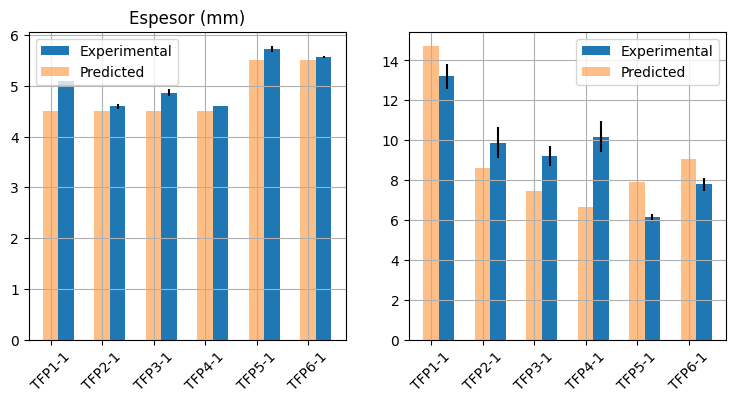

In [115]:
# plot bars with error bars Espesor (mm)
width = 0.3
idx = df_stats.index
idx_range = np.arange(len(idx))

fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(121)

plt.bar(idx_range+width , df_stats['t [mm]']['mean'], yerr=df_stats['t [mm]']['std'], label='Experimental',width=width)
plt.bar(idx_range, tau_pred, label='Predicted', alpha=0.5, width=width)
plt.title('Espesor (mm)')

plt.legend()
plt.xticks(rotation=45)
plt.xlabel('') 
plt.grid()
plt.xticks(idx_range, idx);

ax = fig.add_subplot(122)

# plot bars with error bars Modulo Tracción [MPa] and prediction

plt.bar(idx_range+width , df_stats['E [GPa]']['mean'], yerr=df_stats['E [GPa]']['std'], label='Experimental',width=width)
plt.bar(idx_range, df_stats['E pred [GPa]'], label='Predicted', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)
# tick labels 
plt.xticks(idx_range, idx);


In [116]:
df_stats["t [mm]"].values

array([[5.1       , 0.        ],
       [4.6       , 0.05      ],
       [4.86666667, 0.07637626],
       [4.6       , 0.        ],
       [5.71666667, 0.05773503],
       [5.56666667, 0.02886751]])

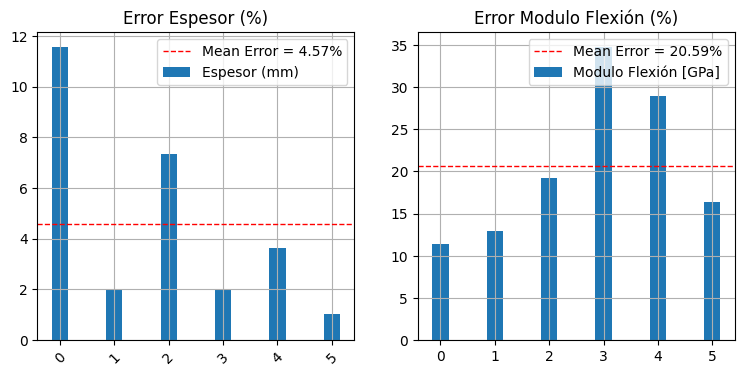

In [117]:
# error 

df_stats["E error [%]"] = 100*abs(df_stats['E [GPa]']['mean'] - df_stats['E pred [GPa]'])/df_stats['E [GPa]']['mean']

df_stats["t error [%]"] = 100*abs(df_stats['t [mm]']['mean'] - tau_pred)/df_stats['t [mm]']['mean']

fig = plt.figure(figsize=(9, 4))

ax = fig.add_subplot(121)

plt.bar(idx_range, df_stats['t error [%]'], label='Espesor (mm)',width=width)
# line in error mean 
plt.axhline(df_stats['t error [%]'].mean(), color='r', 
            linestyle='dashed', linewidth=1,label='Mean Error = {:.2f}%'.format(df_stats['t error [%]'].mean()))
plt.title('Error Espesor (%)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)



ax = fig.add_subplot(122)

plt.bar(idx_range, df_stats['E error [%]'], 
        label='Modulo Flexión [GPa]',width=width)

# line in error mean
plt.axhline(df_stats['E error [%]'].mean(), color='r', 
            linestyle='dashed', 
            linewidth=1,
            label='Mean Error = {:.2f}%'.format(df_stats['E error [%]'].mean()))

plt.title('Error Modulo Flexión (%)')
plt.grid()
plt.legend()

In [118]:
# X,SX,Y,SY

In [119]:
print("E_n_opt",E_n_opt)
print("E_l_opt",E_l_opt)

E_n_opt 4.215396419192965
E_l_opt [26.94707235 13.57485463 97.86484327  4.21539642]


In [120]:
df_opt = pd.DataFrame({"E [GPa]": [E_n_opt,*E_l_opt]})
df_opt.index = ["nucleo","X","SX","Y","SY"]
df_opt.round(2)

,E [GPa]
nucleo,4.22
X,26.95
SX,13.57
Y,97.86
SY,4.22
